In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.datasets import fashion_mnist

In [19]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
len(x_train)

60000

In [9]:
len(x_test)

10000

這是 Sneaker


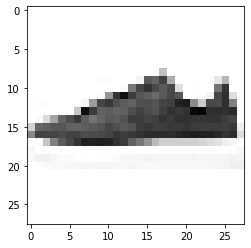

In [20]:
n = 619
print("這是",class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

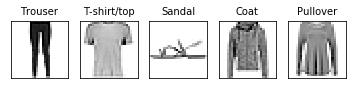

In [21]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys') 

In [22]:
x_train = x_train/255
x_test = x_test/255

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [25]:
from tensorflow.keras.utils import to_categorical

In [28]:
y_train = to_categorical(y_train,10)
y_teat = to_categorical(y_test,10)

In [29]:
y_train[619]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [31]:
model = Sequential()

In [33]:
model.add(Dense(69,input_dim=784,activation='relu'))
model.add(Dense(69,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [34]:
model.compile(loss='mse', optimizer=SGD(lr=0.0825), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 69)                54165     
_________________________________________________________________
dense_1 (Dense)              (None, 69)                4830      
_________________________________________________________________
dense_2 (Dense)              (None, 69)                4830      
_________________________________________________________________
dense_3 (Dense)              (None, 69)                4830      
_________________________________________________________________
dense_4 (Dense)              (None, 69)                4830      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                700       
Total params: 74,185
Trainable params: 74,185
Non-trainable params: 0
____________________________________________________

In [36]:
784*69+69

54165

In [37]:
model.fit(x_train, y_train, batch_size=99, epochs=25)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0892 - accuracy: 0.1318
Epoch 2/25
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0826 - accuracy: 0.3152
Epoch 3/25
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0649 - accuracy: 0.5435
Epoch 4/25
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0434 - accuracy: 0.6830
Epoch 5/25
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0356 - accuracy: 0.7610
Epoch 6/25
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0309 - accuracy: 0.7938
Epoch 7/25
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0284 - accuracy: 0.8079
Epoch 8/25
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0268 - accuracy: 0.8167
Epoch 9/25
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0256 - accuracy: 0.8257
Epoch 10/25
60

In [38]:
result = model.predict_classes(x_test)

In [39]:
def show_result(p):
    print('神經網路說是:',class_names[result[p]])
    plt.imshow(x_test[p].reshape(28,28),cmap='Greys')

神經網路說是: Shirt


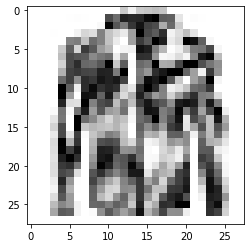

In [43]:
show_result(17)

神經網路說是: Trouser


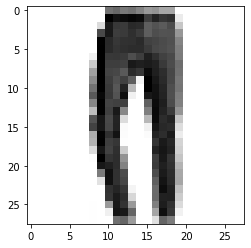

In [42]:
show_result(825)

神經網路說是: Bag


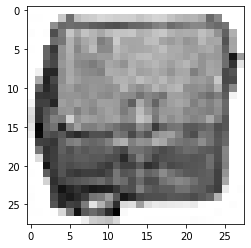

In [44]:
show_result(619)